# Generate cellxgene

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys

def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures_manual_annotation/data_utils/'
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable


def grouped_obs_percent(adata, group_key, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])
        X.data = X.data > 0.01
        perc = np.asarray(np.sum(X,axis=0)/X.shape[0]).reshape(-1)
        out[group] = [round(i, 2) for i in perc ]
    return out


def grouped_obs_mean(adata, group_key, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])
        out[group] = np.ravel(X.mean(axis=0, dtype=np.float64))
    return out

# Prepare INPUT

## Load andata

In [2]:
adata = sc.read('FCA-M3clusters.h5ad')
adata.X.shape

(319081, 28037)

### Load cell clusters annotation

In [3]:
# Add cluster name and doublet information
clu_annot = pd.read_csv('figures_manual_annotation/clustering_metadata.csv', header=0, index_col=0)
import collections 

if collections.Counter(adata.obs.index) == collections.Counter(clu_annot.index): 
    print ("The lists are identical") 
else : 
    print ("The lists are not identical") 
    
vars2import = ['clusters_manual','louvain', 'is_doublet', 'scrublet_cluster_score', 'scrublet_score']
for var in vars2import:
    adata.obs[var] = clu_annot[var]

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (24,25,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The lists are identical


In [4]:
adata.obs['lineage'] = adata.obs['clusters_manual'].tolist()
adata.obs['lineage'] = adata.obs['lineage'].replace(regex=r'Supporting_female', value='Supporting')
set(adata.obs['lineage'] )


{'Coel Epi',
 'Doublets',
 'Endothelial',
 'Epithelial',
 'Erythroid',
 'Germ cells',
 'Immune',
 'Mesenchymal_GATA2_NR2F1',
 'Mesenchymal_LHX9_ARX',
 'Metanephros',
 'Neural',
 'PV',
 'Sertoli',
 'Supporting',
 'lowQC'}

In [5]:
adata.obs.head()

,n_genes,sample,individual,location,stage,sex,study,batch_collection,process,cryopreserved,...,bh_pval,bonf_pval,is_doublet,PCW,sample_source,clusters,sub_clusters,louvain,clusters_manual,lineage
FCA_GND8047885_AAACCTGAGCACACAG,2554,FCA_GND8047885,F81,Gonad,8.8,female,FCA,A,CD45-,No,...,0.828363,1.0,False,8.8,N,Supporting,preGC_RDH10,1,Supporting_female,Supporting
FCA_GND8047885_AAACCTGAGCACGCCT,2032,FCA_GND8047885,F81,Gonad,8.8,female,FCA,A,CD45-,No,...,0.936713,1.0,False,8.8,N,Supporting,preGCc_CSRNP1,1,Supporting_female,Supporting
FCA_GND8047885_AAACCTGAGCAGCCTC,2664,FCA_GND8047885,F81,Gonad,8.8,female,FCA,A,CD45-,No,...,0.900946,1.0,False,8.8,N,Stromal_cycling,Stromal_cycling,2,Mesenchymal_LHX9_ARX,Mesenchymal_LHX9_ARX
FCA_GND8047885_AAACCTGAGCCACGCT,2256,FCA_GND8047885,F81,Gonad,8.8,female,FCA,A,CD45-,No,...,0.900946,1.0,False,8.8,N,Supporting,sLGR5,1,Supporting_female,Supporting
FCA_GND8047885_AAACCTGAGCTTTGGT,2064,FCA_GND8047885,F81,Gonad,8.8,female,FCA,A,CD45-,No,...,0.828363,1.0,False,8.8,N,Stromal,Oi_STAR,4,lowQC,lowQC


In [6]:
del adata.obs['study']
del adata.obs['stage']
del adata.obs['location']
del adata.obs['5v1.1']
del adata.obs['batch_collection']
del adata.obs['TP']
del adata.obs['cryopreserved']
del adata.obs['clusters_manual']
del adata.obs['batch']
del adata.obs['clusters']
del adata.obs['sub_clusters']

# Import sub-analysis

In [7]:
supporting = pd.read_csv('/nfs/team292/lg18/with_valentina/supporting_nocycling_annotation.csv', index_col = 0)
print(supporting['annotated_clusters'].value_counts())
supporting = supporting[supporting['annotated_clusters'].isin(['coelEpi', 'sKITLG', 'sLGR5', 'sPAX8', 'preGC_I_OSR1',
                                                        'ovarianSurf', 'preGC_II_hypoxia', 'preGC_II', 'preGC_III', 'preGC_III_Notch',
                                                       'Sertoli_WFDC2', 'Sertoli', 'Sertoli_low'])]
print(supporting['annotated_clusters'].value_counts())
# Remane to match
mask1 = np.array([i in 'preGC_II' for i in supporting['annotated_clusters']])
supporting.loc[mask1, 'annotated_clusters'] = 'preGC_IIa'
mask1 = np.array([i in 'preGC_II_hypoxia' for i in supporting['annotated_clusters']])
supporting.loc[mask1, 'annotated_clusters'] = 'preGC_IIb'
mask1 = np.array([i in 'preGC_III' for i in supporting['annotated_clusters']])
supporting.loc[mask1, 'annotated_clusters'] = 'preGC_IIc'
mask1 = np.array([i in 'preGC_III_Notch' for i in supporting['annotated_clusters']])
supporting.loc[mask1, 'annotated_clusters'] = 'granulosa'
mask1 = np.array([i in 'preGC_I_OSR1' for i in supporting['annotated_clusters']])
supporting.loc[mask1, 'annotated_clusters'] = 'preGC_I'

mask1 = np.array([i in 'sLGR5' for i in supporting['annotated_clusters']])
supporting.loc[mask1, 'annotated_clusters'] = 'sLGR5_female'
print(supporting['annotated_clusters'].value_counts())

mask2 = np.array([i in 'male' for i in supporting['sex']])
mask = [all(tup) for tup in zip(mask1, mask2)]
supporting.loc[mask, 'annotated_clusters'] = 'sLGR5_male'
supporting['annotated_clusters'] = ['Supp_'+i for i in supporting['annotated_clusters'] ]
print(supporting['annotated_clusters'].value_counts())

Sertoli             19227
preGC_I_OSR1        11714
Sertoli_low          8763
preGC_II_hypoxia     8180
preGC_III            7871
preGC_II             6669
ovarianSurf          5148
coelEpi              4385
sLGR5                2660
preGC_III_Notch      2409
sPAX8b               1783
sPAX8m               1645
sKITLG               1245
Sertoli_WFDC2        1074
FetalLeydig-like      460
Name: annotated_clusters, dtype: int64
Sertoli             19227
preGC_I_OSR1        11714
Sertoli_low          8763
preGC_II_hypoxia     8180
preGC_III            7871
preGC_II             6669
ovarianSurf          5148
coelEpi              4385
sLGR5                2660
preGC_III_Notch      2409
sKITLG               1245
Sertoli_WFDC2        1074
Name: annotated_clusters, dtype: int64
Sertoli          19227
preGC_I          11714
Sertoli_low       8763
preGC_IIb         8180
preGC_IIc         7871
preGC_IIa         6669
ovarianSurf       5148
coelEpi           4385
sLGR5_female      2660
granulosa    

In [8]:
mesenchymal = pd.read_csv('/nfs/team292/lg18/with_valentina/mesenchymal_annotated.csv', index_col = 0)
print(mesenchymal['annotated_clusters'].value_counts())
mesenchymal = mesenchymal[mesenchymal['annotated_clusters'].isin(['FetalLeydig', 'Ti', 'Oi', 'Gi'])]
# Remane to match
mask1 = np.array([i in 'Gi' for i in mesenchymal['annotated_clusters']])
mesenchymal.loc[mask1, 'annotated_clusters'] = 'dorsalMesentery'
mask1 = np.array([i in 'Oi' for i in mesenchymal['annotated_clusters']])
mesenchymal.loc[mask1, 'annotated_clusters'] = 'ovarianStroma'
mask1 = np.array([i in 'Ti' for i in mesenchymal['annotated_clusters']])
mesenchymal.loc[mask1, 'annotated_clusters'] = 'testisStroma'

mesenchymal['annotated_clusters'] = ['Mesen_'+i for i in mesenchymal['annotated_clusters'] ]
print(mesenchymal['annotated_clusters'].value_counts())

M_MGP               26162
Ti                  24745
M_cycling           16376
Gi                  14846
Oi                  11900
M_MullDuct_LGR5      6811
M_prog_ISL1          5021
M_ALX1               4625
M_MullDuct_AMHR2     3318
FetalLeydig          2368
Name: annotated_clusters, dtype: int64
Mesen_testisStroma       24745
Mesen_dorsalMesentery    14846
Mesen_ovarianStroma      11900
Mesen_FetalLeydig         2368
Name: annotated_clusters, dtype: int64


In [9]:
germ = pd.read_csv('/nfs/team292/lg18/with_valentina/germcells_annotation.csv', index_col = 0)
print(germ['annotated_clusters'].value_counts())
germ = germ[germ['annotated_clusters'].isin(['PGC', 'PGC_mitotic', 'GC_mitotic',
                                             'oogonia_STRA8', 'oogonia_meiosis', 'oocyte',
                                            'pre-spermatogonia'])]
mask1 = np.array([i in 'GC_mitotic' for i in germ['annotated_clusters']])
germ.loc[mask1, 'annotated_clusters'] = 'fGC_mitotic'

germ['annotated_clusters'] = ['Germcells_'+i for i in germ['annotated_clusters'] ]
print(germ['annotated_clusters'].value_counts())

PGC                  2011
oogonia_meiosis      1852
oogonia_STRA8        1672
oocyte                919
PGC_mitotic           869
GC_mitotic            793
pre-spermatogonia     753
Name: annotated_clusters, dtype: int64
Germcells_PGC                  2011
Germcells_oogonia_meiosis      1852
Germcells_oogonia_STRA8        1672
Germcells_oocyte                919
Germcells_PGC_mitotic           869
Germcells_fGC_mitotic           793
Germcells_pre-spermatogonia     753
Name: annotated_clusters, dtype: int64


In [11]:
epi = pd.read_csv('/nfs/team292/lg18/with_valentina/epithelial_annotation.csv', index_col = 0)
print(epi['annotated_clusters'].value_counts())
epi = epi[epi['annotated_clusters'].isin(['MullDuct', 'Mesoduct_CUBN', 'Mesoduct_GATA3', 'Epididymis'])]
print(epi['annotated_clusters'].value_counts())


epi['annotated_clusters'] = ['Epi_'+i for i in epi['annotated_clusters'] ]
print(epi['annotated_clusters'].value_counts())

MullDuct          4616
Mesoduct_CUBN     1426
Mesoduct_GATA3     941
Epididymis         275
Name: annotated_clusters, dtype: int64
MullDuct          4616
Mesoduct_CUBN     1426
Mesoduct_GATA3     941
Epididymis         275
Name: annotated_clusters, dtype: int64
Epi_MullDuct          4616
Epi_Mesoduct_CUBN     1426
Epi_Mesoduct_GATA3     941
Epi_Epididymis         275
Name: annotated_clusters, dtype: int64


In [12]:
supporting_mesenchymal = supporting.append(mesenchymal)
supporting_mesenchymal = supporting_mesenchymal.append(germ)
supporting_mesenchymal = supporting_mesenchymal.append(epi)
mapping_dict = supporting_mesenchymal['annotated_clusters'].to_dict()
adata.obs['annotated_clusters'] = adata.obs_names.map(mapping_dict)
adata.obs['annotated_clusters'].value_counts(dropna = False)

NaN                            169750
Mesen_testisStroma              24745
Supp_Sertoli                    19227
Mesen_dorsalMesentery           14846
Mesen_ovarianStroma             11900
Supp_preGC_I                    11714
Supp_Sertoli_low                 8763
Supp_preGC_IIb                   8180
Supp_preGC_IIc                   7871
Supp_preGC_IIa                   6669
Supp_ovarianSurf                 5148
Epi_MullDuct                     4616
Supp_coelEpi                     4385
Supp_granulosa                   2409
Supp_sLGR5_female                2380
Mesen_FetalLeydig                2368
Germcells_PGC                    2011
Germcells_oogonia_meiosis        1852
Germcells_oogonia_STRA8          1672
Epi_Mesoduct_CUBN                1426
Supp_sKITLG                      1245
Supp_Sertoli_WFDC2               1074
Epi_Mesoduct_GATA3                941
Germcells_oocyte                  919
Germcells_PGC_mitotic             869
Germcells_fGC_mitotic             793
Germcells_pr

In [13]:
# Replace NaN with big clusters 
adata.obs['annotated_clusters'] = adata.obs['annotated_clusters'].fillna(adata.obs['lineage'])
adata.obs['annotated_clusters'].value_counts(dropna = False)

Mesenchymal_GATA2_NR2F1        63684
Mesen_testisStroma             24745
lowQC                          20815
Supp_Sertoli                   19227
Supporting                     16081
Mesen_dorsalMesentery          14846
Mesen_ovarianStroma            11900
Mesenchymal_LHX9_ARX           11768
Supp_preGC_I                   11714
Endothelial                    10948
Supp_Sertoli_low                8763
Sertoli                         8730
Supp_preGC_IIb                  8180
Supp_preGC_IIc                  7871
PV                              7440
Erythroid                       7423
Supp_preGC_IIa                  6669
Doublets                        5639
Immune                          5157
Supp_ovarianSurf                5148
Epi_MullDuct                    4616
Supp_coelEpi                    4385
Coel Epi                        3092
Neural                          2530
Germ cells                      2519
Epithelial                      2421
Supp_granulosa                  2409
S

In [14]:
# Clean cells
mask1 = np.array([i in 'oublet' for i in adata.obs['annotated_clusters'] ])
mask2 = np.array([i in 'cycling' for i in adata.obs['annotated_clusters'] ])
mask3 = np.array([i in ['Coel Epi', 'Doublets', 'lowQC', 'Epithelial', 'Supporting' ,'Sertoli',  'Germ cells', 'Mesenchymal_LHX9_ARX'] for i in adata.obs['annotated_clusters'] ])
mask = [any(tup) for tup in zip(mask1, mask2, mask3)]
adata.obs.loc[mask, 'annotated_clusters'] = 'lowQC_or_cycling'
adata.obs['annotated_clusters'].value_counts(dropna = False)

lowQC_or_cycling               71065
Mesenchymal_GATA2_NR2F1        63684
Mesen_testisStroma             24745
Supp_Sertoli                   19227
Mesen_dorsalMesentery          14846
Mesen_ovarianStroma            11900
Supp_preGC_I                   11714
Endothelial                    10948
Supp_Sertoli_low                8763
Supp_preGC_IIb                  8180
Supp_preGC_IIc                  7871
PV                              7440
Erythroid                       7423
Supp_preGC_IIa                  6669
Immune                          5157
Supp_ovarianSurf                5148
Epi_MullDuct                    4616
Supp_coelEpi                    4385
Neural                          2530
Supp_granulosa                  2409
Supp_sLGR5_female               2380
Mesen_FetalLeydig               2368
Germcells_PGC                   2011
Germcells_oogonia_meiosis       1852
Germcells_oogonia_STRA8         1672
Metanephros                     1503
Epi_Mesoduct_CUBN               1426
S

In [15]:
adata.obs['cell_type'] = adata.obs['annotated_clusters'].tolist()
del adata.obs['annotated_clusters']

In [16]:
# Scale data

In [17]:
UMAP = adata.obsm['X_umap']
adata = anndata.AnnData(X=adata.raw.X, var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)                                                                                                            
# sc.pp.scale(adata, max_value=10)

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [18]:
adata.obsm['X_umap'] = UMAP

... storing 'lineage' as categorical
... storing 'cell_type' as categorical


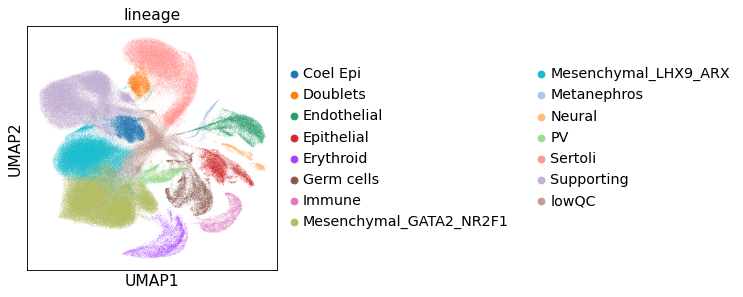

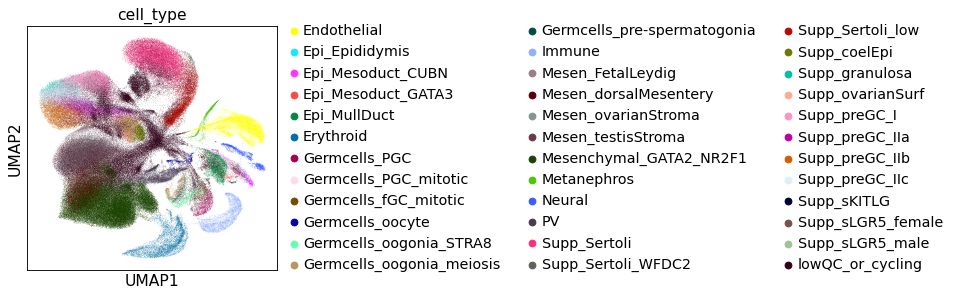

In [19]:
sc.pl.umap(adata, color='lineage')
sc.pl.umap(adata, color='cell_type')

In [20]:
adata.obs['lineage'] = pd.Categorical(adata.obs['lineage'])
adata.obs['cell_type'] = pd.Categorical(adata.obs['cell_type'])
adata.obs['PCW'] = np.float32(adata.obs['PCW'])

In [21]:
adata.write('/nfs/cellgeni/tickets/tic-613/FCAgonads_main.h5ad')

In [22]:
adata.obs.to_csv('barcodes_stats.csv')

In [24]:
import rpy2.rinterface_lib.callbacks
import logging
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython


ModuleNotFoundError: No module named 'rpy2'

In [ ]:
adata = anndata.AnnData(X = adata.raw.X, var = adata.raw.var, obs = adata.obs)

In [ ]:
%%R -i adata
adata

In [ ]:
%%R -o mrks

library(SoupX)
counts <- assay(adata, "X")
colnames(counts) <- colnames(adata)
rownames(counts) <- rownames(adata)
mrks = quickMarkers(counts, colData(adata)$lineage, N = 100) # where clusters is the cell type assignment and 100 means I want the top 100 genes per cluster that pass the hypergeometric test

In [ ]:
mrks.to_csv('TFIDF.csv')